In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from fbprophet.plot import plot_components

In [6]:
!unzip /content/drive/MyDrive/household_power_consumption.zip

Archive:  /content/drive/MyDrive/household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [7]:
df= pd.read_csv("/content/household_power_consumption.txt",parse_dates=True, index_col="Date",sep=";",low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    object 
 2   Global_reactive_power  object 
 3   Voltage                object 
 4   Global_intensity       object 
 5   Sub_metering_1         object 
 6   Sub_metering_2         object 
 7   Sub_metering_3         float64
dtypes: float64(1), object(7)
memory usage: 142.5+ MB


In [9]:
df[["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]]=df[["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]].apply(pd.to_numeric,errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 142.5+ MB


In [11]:
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
df.tail()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2010-11-26,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [13]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Downsampling and filling with mean

In [14]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [103]:
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [15]:
df_1=df.resample("D").sum()

In [105]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [17]:
df_1.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

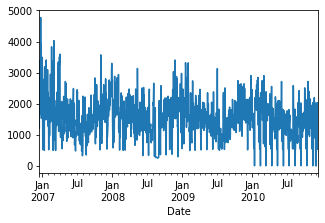

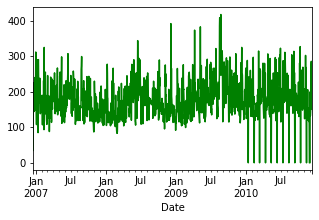

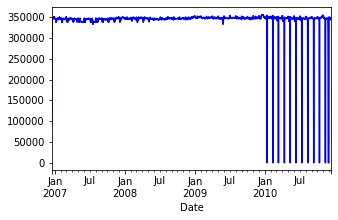

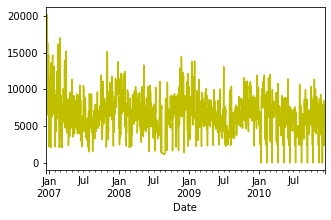

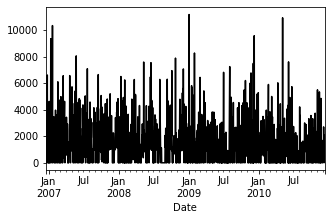

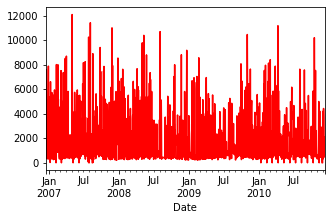

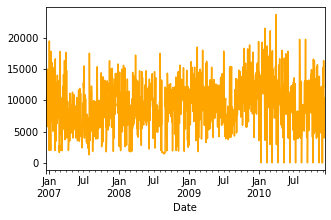

In [18]:
plt.figure(figsize=(5, 3))
df_1.Global_active_power.plot()
plt.show()
plt.figure(figsize=(5, 3))
df_1.Global_reactive_power.plot(color='g')
plt.show()
plt.figure(figsize=(5, 3))
df_1.Voltage.plot(color='b')
plt.show()
plt.figure(figsize=(5, 3))
df_1.Global_intensity.plot(color='y')
plt.show()
plt.figure(figsize=(5, 3))
df_1.Sub_metering_1.plot(color='black')
plt.show()
plt.figure(figsize=(5, 3))
df_1.Sub_metering_2.plot(color='r')
plt.show()
plt.figure(figsize=(5, 3))
df_1.Sub_metering_3.plot(color='orange')
plt.show()

Text(0, 0.5, 'Global_active_power')

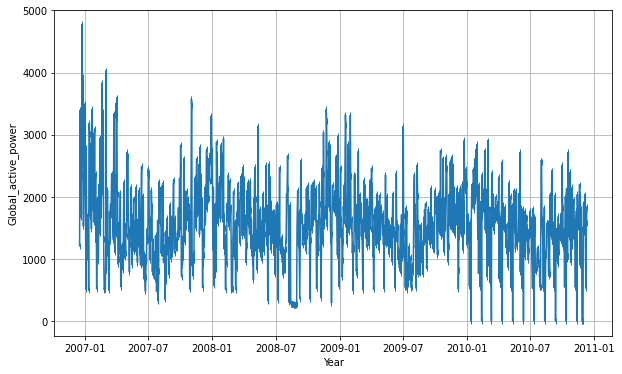

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df_1.index, df_1.Global_active_power, '-', marker='|', )
plt.grid()
plt.xlabel("Year")
plt.ylabel('Global_active_power')

In [102]:
df_1.corr(method='pearson')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.127081,0.265571,0.999220,0.550647,0.486537,0.749872
Global_reactive_power,0.127081,1.000000,0.349670,0.148791,0.333737,0.201664,0.119110
Voltage,0.265571,0.349670,1.000000,0.269229,0.100150,0.086008,0.263642
Global_intensity,0.999220,0.148791,0.269229,1.000000,0.562513,0.495339,0.742301
Sub_metering_1,0.550647,0.333737,0.100150,0.562513,1.000000,0.258569,0.323297
Sub_metering_2,0.486537,0.201664,0.086008,0.495339,0.258569,1.000000,0.213949
Sub_metering_3,0.749872,0.119110,0.263642,0.742301,0.323297,0.213949,1.000000


In [21]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_1['Global_active_power'])
print("For Global_active_power")
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'{k}: {v}') 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



For Global_active_power
ADF Statistic: -9.609344713081768
p-value: 1.8294723965607942e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
1%: -3.4348709954268384
5%: -2.863536715724964
10%: -2.567833035595811


In [22]:
print('Global_active_power')
adf_result = adfuller(df_1.Global_active_power)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')

print('-------------------------------------------------------')
print('Global_reactive_power')
adf_result = adfuller(df_1.Global_reactive_power)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')

print('-------------------------------------------------------')
print('Global_intensity')
adf_result = adfuller(df_1.Global_intensity)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')
print( 'Critical Values:' )

Global_active_power
ADF Statistic: -9.609344713081768
p-value: 1.8294723965607942e-16
No. of lags used: 7
No. of observations used : 1449
Critical Values:
 1% : -3.4348709954268384 
 5% : -2.863536715724964 
 10% : -2.567833035595811 
Data is Stationary
-------------------------------------------------------
Global_reactive_power
ADF Statistic: -10.263795571006323
p-value: 4.1699431292258905e-18
No. of lags used: 6
No. of observations used : 1450
Critical Values:
 1% : -3.4348678719530934 
 5% : -2.863535337271721 
 10% : -2.5678323015457787 
Data is Stationary
-------------------------------------------------------
Global_intensity
ADF Statistic: -9.676118057378567
p-value: 1.2394990163895498e-16
No. of lags used: 7
No. of observations used : 1449
 1% : -3.4348709954268384 
 5% : -2.863536715724964 
 10% : -2.567833035595811 
Data is Stationary
Critical Values:


In [23]:
print('Voltage')
adf_result = adfuller(df_1.Voltage)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')

print('-------------------------------------------------------')
print('Sub_metering_1')
adf_result = adfuller(df_1.Sub_metering_1)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
print( 'Critical Values:' )
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')

print('-------------------------------------------------------')
print('Sub_metering_2')
adf_result = adfuller(df_1.Sub_metering_2)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
    print( 'Critical Values:' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')


Voltage
ADF Statistic: -22.11744157199106
p-value: 0.0
No. of lags used: 1
No. of observations used : 1455
Critical Values:
 1% : -3.4348523191002123 
 5% : -2.8635284734563364 
 10% : -2.567828646449617 
Data is Stationary
-------------------------------------------------------
Sub_metering_1
ADF Statistic: -12.003981260025453
p-value: 3.2965355424166647e-22
No. of lags used: 7
No. of observations used : 1449
Critical Values:
 1% : -3.4348709954268384 
 5% : -2.863536715724964 
 10% : -2.567833035595811 
Data is Stationary
-------------------------------------------------------
Sub_metering_2
ADF Statistic: -12.44207381697295
p-value: 3.7340957103463564e-23
No. of lags used: 6
No. of observations used : 1450
 1% : -3.4348678719530934 
Critical Values:
 5% : -2.863535337271721 
Critical Values:
 10% : -2.5678323015457787 
Critical Values:
Data is Stationary


In [24]:
print('Sub_metering_3')
adf_result = adfuller(df_1.Sub_metering_3)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('No. of lags used:', adf_result[2])
print('No. of observations used :', adf_result[3])
for k, v in adf_result[4].items():
    print( f' {k} : {v} ' )
    print( 'Critical Values:' )
if adf_result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not Stationary')


Sub_metering_3
ADF Statistic: -7.948438076593785
p-value: 3.1733360577557295e-12
No. of lags used: 10
No. of observations used : 1446
 1% : -3.434880391815318 
Critical Values:
 5% : -2.8635408625359315 
Critical Values:
 10% : -2.5678352438452814 
Critical Values:
Data is Stationary


In [25]:
df_2=df_1.reset_index()

In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1457 non-null   datetime64[ns]
 1   Global_active_power    1457 non-null   float64       
 2   Global_reactive_power  1457 non-null   float64       
 3   Voltage                1457 non-null   float64       
 4   Global_intensity       1457 non-null   float64       
 5   Sub_metering_1         1457 non-null   float64       
 6   Sub_metering_2         1457 non-null   float64       
 7   Sub_metering_3         1457 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 91.2 KB


In [92]:
df_2.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [27]:
new= df_2[['Date', 'Global_active_power']]
Proph=new.rename(columns={"Date": "ds", "Global_active_power": "y"})
Proph.head()


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [28]:
train=Proph.head(n=1092)
test=Proph.tail(n=365)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1092 to 1456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
 1   y       365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [29]:
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
forecast = model.predict(test)

In [94]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1533.013022,1293.537612,2750.067314,1533.013022,1533.013022,447.893128,447.893128,447.893128,149.612993,149.612993,149.612993,298.280135,298.280135,298.280135,0.0,0.0,0.0,1980.906150
1,2009-12-13,1532.965428,1257.548930,2704.098529,1532.965428,1532.965428,446.380083,446.380083,446.380083,138.202356,138.202356,138.202356,308.177726,308.177726,308.177726,0.0,0.0,0.0,1979.345511
2,2009-12-14,1532.917834,984.548809,2468.276943,1532.917834,1532.917834,218.432840,218.432840,218.432840,-101.328105,-101.328105,-101.328105,319.760945,319.760945,319.760945,0.0,0.0,0.0,1751.350675
3,2009-12-15,1532.870241,1178.853067,2575.139315,1532.870241,1532.870241,334.454878,334.454878,334.454878,1.644292,1.644292,1.644292,332.810585,332.810585,332.810585,0.0,0.0,0.0,1867.325118
4,2009-12-16,1532.822647,1078.370936,2620.016930,1532.822647,1532.822647,309.927496,309.927496,309.927496,-37.132607,-37.132607,-37.132607,347.060102,347.060102,347.060102,0.0,0.0,0.0,1842.750142


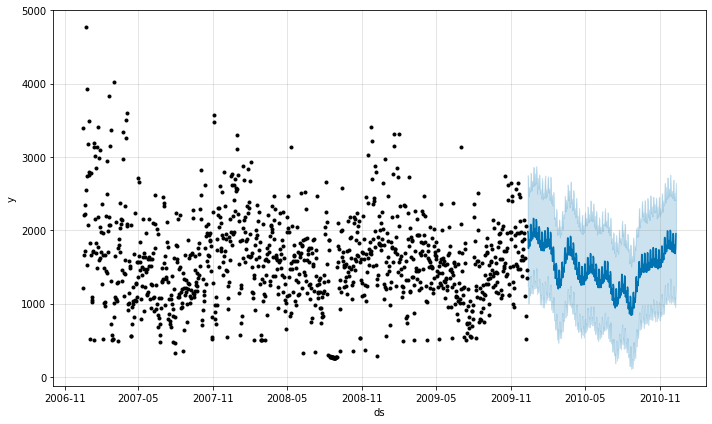

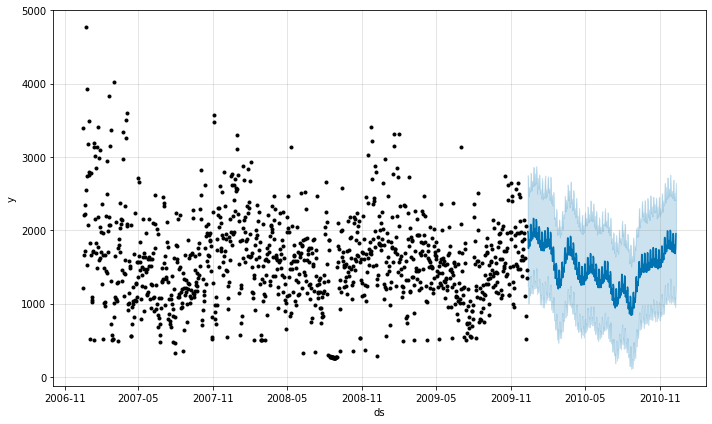

In [72]:
model.plot(forecast)

**Metrics Calculations**

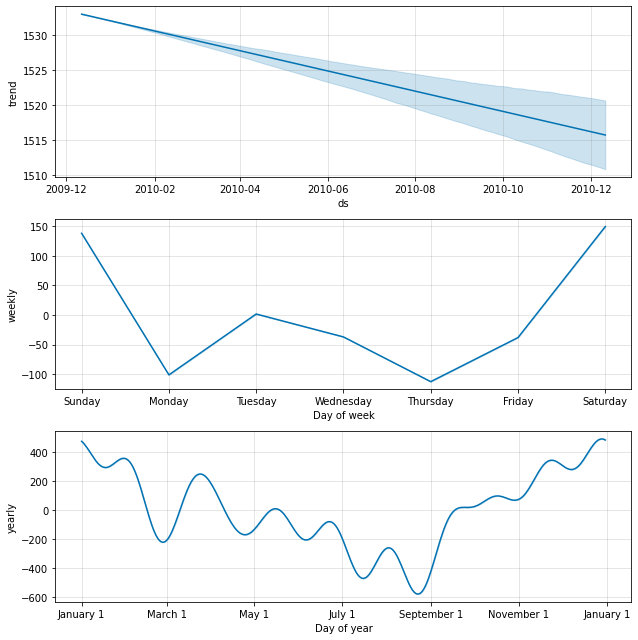

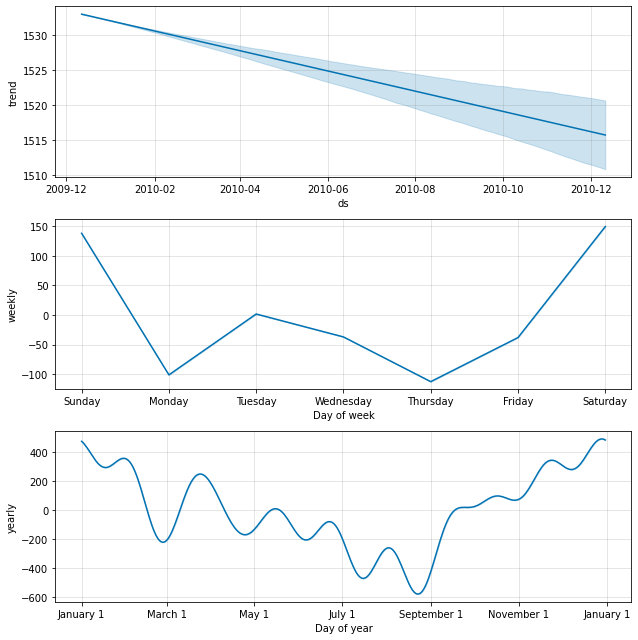

In [32]:
model.plot_components(forecast)

**Multivariate Train Test Split**

In [95]:
multi=df_2.rename(columns={'Date':'ds','Global_active_power':'y','Global_reactive_power':'add1',
'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4','Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [96]:
multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1457 non-null   datetime64[ns]
 1   y       1457 non-null   float64       
 2   add1    1457 non-null   float64       
 3   add2    1457 non-null   float64       
 4   add3    1457 non-null   float64       
 5   add4    1457 non-null   float64       
 6   add5    1457 non-null   float64       
 7   add6    1457 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 91.2 KB


In [34]:
model_2 = Prophet()
model_2.add_regressor('add1')
model_2.add_regressor('add2')
model_2.add_regressor('add3')
model_2.add_regressor('add4')
model_2.add_regressor('add5')
model_2.add_regressor('add6')

In [98]:
multi_train=multi.head(n=1092)
multi_test=multi.tail(n=365)
multi_train

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1087,2009-12-07,513.478,191.480,348919.11,2305.4,0.0,589.0,4060.0
1088,2009-12-08,824.436,272.552,348203.92,3678.2,912.0,689.0,4991.0
1089,2009-12-09,2064.358,325.196,346618.15,8845.2,9583.0,1202.0,12601.0
1090,2009-12-10,1351.604,157.714,345922.31,5714.8,997.0,515.0,9420.0


In [36]:
model_2.fit(multi_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = model_2.make_future_dataframe(periods=10, freq='D') 
forecast_2 = model.predict(future) 
forecast_2.head()
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
forecast_2 = model_2.predict(multi_test) 

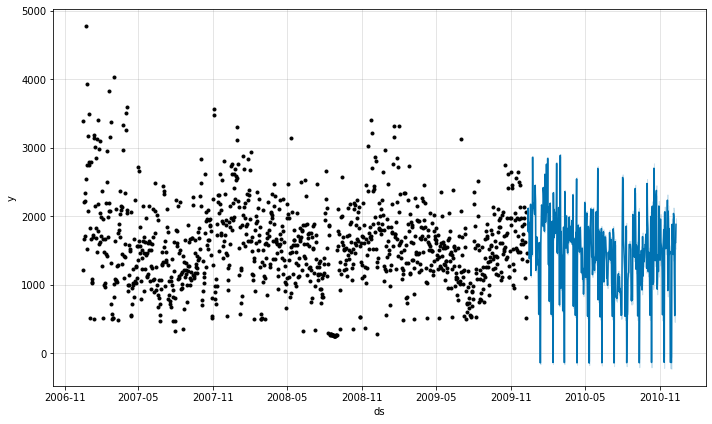

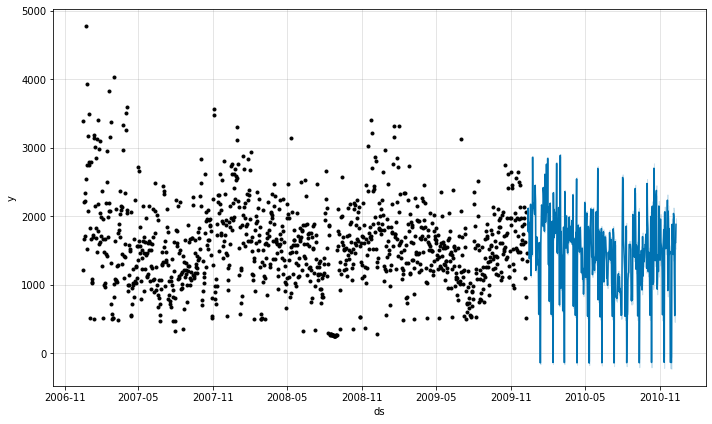

In [91]:
model_2.plot(forecast_2)

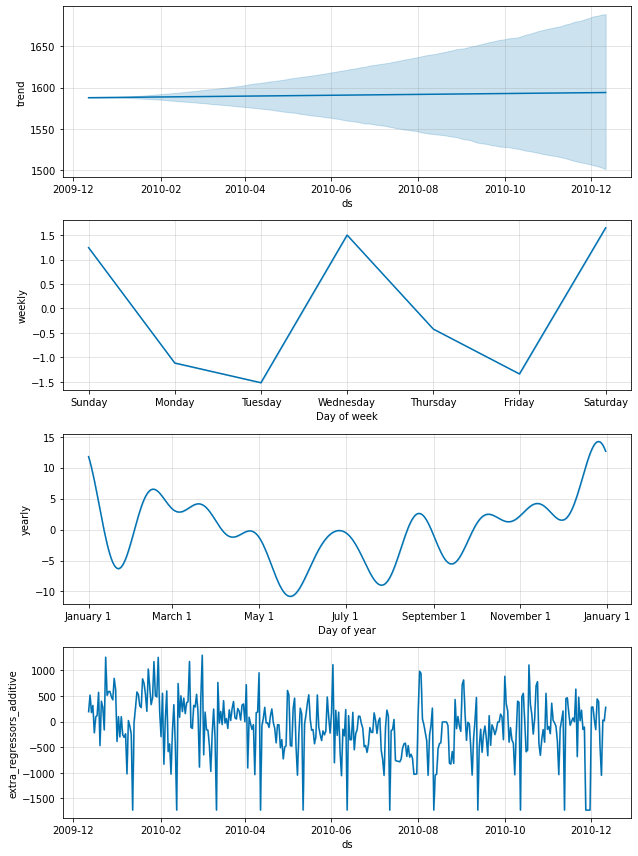

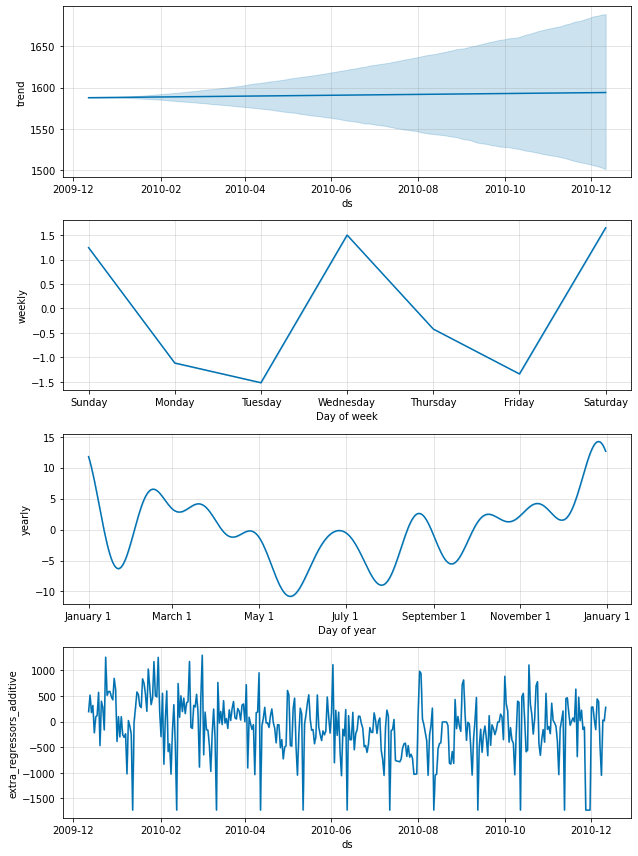

In [54]:
model_2.plot_components(forecast_2)

In [55]:
Y = np.array(test["y"])
Y_pred = np.array(forecast["yhat"])

Y_2 = np.array(multi_test["y"])
Y_pred_2 = np.array(forecast_2["yhat"])

***Metrics Calculation***

In [61]:
# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mape = mean_absolute_percentage_error(Y,Y_pred)
print('%.2f'%mape, 'MAPE')

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(Y,Y_pred))
rmse


2.935982540557718e+17 MAPE


562.4441177638498

In [89]:
# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mape_2 = mean_absolute_percentage_error(Y_2,Y_pred_2)
print('%.2f'%mape_2, 'Multivariate  MAPE')

# Root Mean Squared Error
rmse_2 = np.sqrt(mean_squared_error(Y_2,Y_pred_2))
print('%.2f'%rmse_2, 'Multivariate RMSE')


25178635756359696.00 Multivariate  MAPE
31.98 Multivariate RMSE


In [99]:
#Cross validation and performance metrics
from fbprophet.diagnostics import cross_validation, performance_metrics
hpc_score = cross_validation(model,horizon="100 days",period='365 days',initial='365 days')
results = performance_metrics(hpc_score)
results

INFO:fbprophet:Making 2 forecasts with cutoffs between 2008-09-02 00:00:00 and 2009-09-02 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,296880.858852,544.867744,429.580577,0.357588,0.326492,0.80
1,11 days,258805.021105,508.728829,374.196736,0.323489,0.188366,0.80
2,12 days,229704.342317,479.274809,336.669684,0.301157,0.135167,0.85
3,13 days,212214.746179,460.667718,316.476797,0.289163,0.135167,0.85
4,14 days,220724.617477,469.813386,340.167508,0.305185,0.167537,0.85
...,...,...,...,...,...,...,...
86,96 days,388362.495763,623.187368,491.157259,0.359996,0.211692,0.80
87,97 days,548517.653773,740.619777,597.128663,0.666992,0.239835,0.70
88,98 days,533037.574641,730.094223,580.062964,0.664300,0.232044,0.70
89,99 days,528100.169062,726.705008,576.900956,0.669893,0.276527,0.70


In [100]:
#Cross validation and performance metrics
from fbprophet.diagnostics import cross_validation, performance_metrics
hpc_score = cross_validation(model_2,horizon="100 days",period='365 days',initial='365 days')
results = performance_metrics(hpc_score)
results

INFO:fbprophet:Making 2 forecasts with cutoffs between 2008-09-02 00:00:00 and 2009-09-02 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,309.034757,17.579384,14.479021,0.010514,0.011368,0.75
1,11 days,314.654140,17.738493,14.816745,0.010739,0.011368,0.75
2,12 days,290.437268,17.042220,14.174366,0.010302,0.009810,0.75
3,13 days,341.116909,18.469351,15.481380,0.011091,0.011368,0.70
4,14 days,272.281572,16.500957,13.179110,0.009345,0.009193,0.75
...,...,...,...,...,...,...,...
86,96 days,760.331817,27.574115,23.549619,0.013304,0.012062,0.55
87,97 days,675.916661,25.998397,21.602140,0.013953,0.012944,0.60
88,98 days,599.682688,24.488419,20.498171,0.013423,0.012762,0.60
89,99 days,525.066602,22.914332,18.929470,0.012700,0.012062,0.65
